In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
#1.讀入MNSIT數據集
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [8]:
len(x_train)

60000

In [6]:
len(x_test)

10000

正確答案: 1


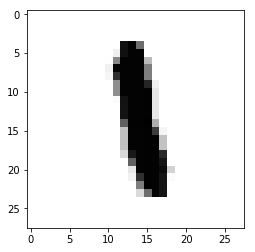

In [8]:
n = 9487
x_train[n]

plt.imshow(x_train[n], cmap = 'Greys')
print('正確答案:', y_train[n])

In [9]:
#資料整理

In [1]:
x_test

NameError: name 'x_test' is not defined

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
x_train = x_train.reshape(60000, 784)/255 #顏色總共255號

In [13]:
x_test = x_test.reshape(10000, 784)/255 #顏色總共255號

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [16]:
y_train[9487]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [17]:
#打造神經網路
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense #每一層的神經網路
from tensorflow.keras.optimizers import SGD #學習方式

In [18]:
model = Sequential() #開一台函數學習機

In [19]:
model.add(Dense(87, input_dim = 784, activation = 'relu')) #第一層87個神經元
model.add(Dense(87, activation = 'relu')) #第二層
model.add(Dense(10, activation = 'softmax'))#輸出層 數字全部加起來是1

W0318 10:35:48.529908 83364 deprecation.py:506] From D:\Anaconda\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [20]:
#組裝Model
model.compile(loss = 'mse', optimizer = SGD(lr = 0.087), metrics = ['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 87)                68295     
_________________________________________________________________
dense_1 (Dense)              (None, 87)                7656      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                880       
Total params: 76,831
Trainable params: 76,831
Non-trainable params: 0
_________________________________________________________________


In [22]:
784*87+87

68295

In [23]:
#訓練
model.fit(x_train, y_train, batch_size = 100, epochs = 20)

Epoch 1/20
60000/60000 [==============================] - 9s 149us/sample - loss: 0.0846 - acc: 0.3122
Epoch 2/20
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0567 - acc: 0.6509
Epoch 3/20
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0322 - acc: 0.8257
Epoch 4/20
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0230 - acc: 0.8689
Epoch 5/20
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0194 - acc: 0.8842
Epoch 6/20
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0174 - acc: 0.8931
Epoch 7/20
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0162 - acc: 0.8993
Epoch 8/20
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0153 - acc: 0.9042
Epoch 9/20
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0146 - acc: 0.9083
Epoch 10/20
60000/60000 [==============================] - 4s 74us/sample - loss:

In [27]:
### 6.訓練成果

In [34]:
predict = model.predict_classes(x_test)

神經網路預測是: 1


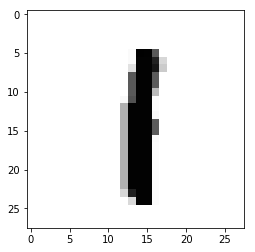

In [36]:
n = 9499
print('神經網路預測是:', predict[n])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys')